In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data from CSV files (actual.csv, data_set_ALL_AML_independent.csv, data_set_ALL_AML_train.csv)
labels_df = pd.read_csv('/content/actual.csv', index_col='patient')
test_df = pd.read_csv('/content/data_set_ALL_AML_independent.csv')
data_df = pd.read_csv('/content/data_set_ALL_AML_train.csv')

In [3]:
# Preprocess data by dropping unnecessary columns and standardizing gene expression values
test_cols_to_drop = [c for c in test_df.columns if 'call' in c]
test_df = test_df.drop(test_cols_to_drop, axis=1)
test_df = test_df.drop(['Gene Description', 'Gene Accession Number'], axis=1)

In [4]:
data_cols_to_drop = [c for c in data_df.columns if 'call' in c]
data_df = data_df.drop(data_cols_to_drop, axis=1)
data_df = data_df.drop(['Gene Description', 'Gene Accession Number'], axis=1)

labels_df = labels_df.replace({'ALL': 0, 'AML': 1})
train_labels = labels_df[labels_df.index <= 38]
test_labels = labels_df[labels_df.index > 38]

In [5]:
# Transpose the data frames
test_df = test_df.T
train_df = data_df.T

In [6]:
# Combine train and test data for standardization and PCA
full_df = train_df.append(test_df, ignore_index=True)

<ipython-input-6-cb27738edb44>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full_df = train_df.append(test_df, ignore_index=True)


In [7]:
# Standardize the gene expression values
scaler = StandardScaler()
X_std = scaler.fit_transform(full_df)

In [8]:
# Perform PCA on the standardized data
pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_std)

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, labels_df, test_size=0.33, random_state=42)


In [10]:
# Train a Random Forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print("Random Forest Accuracy:", accuracy_rfc)

<ipython-input-10-5f026b318317>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


Random Forest Accuracy: 0.5833333333333334


In [11]:
# Train a Gradient Boosting classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print("Gradient Boosting Accuracy:", accuracy_gbc)

Gradient Boosting Accuracy: 0.75


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Random Forest Feature Importance')

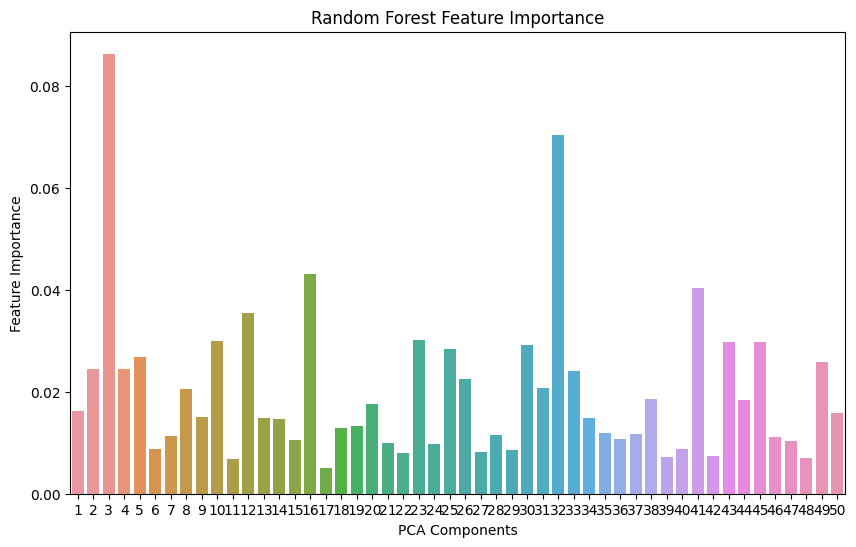

In [12]:
# Plot feature importance for Random Forest classifier
importance_df = pd.DataFrame({
    'feature': range(1, 51),
    'importance': rfc.feature_importances_
})
importance_df_sorted = importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df_sorted, x='feature', y='importance')
plt.xlabel('PCA Components')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')

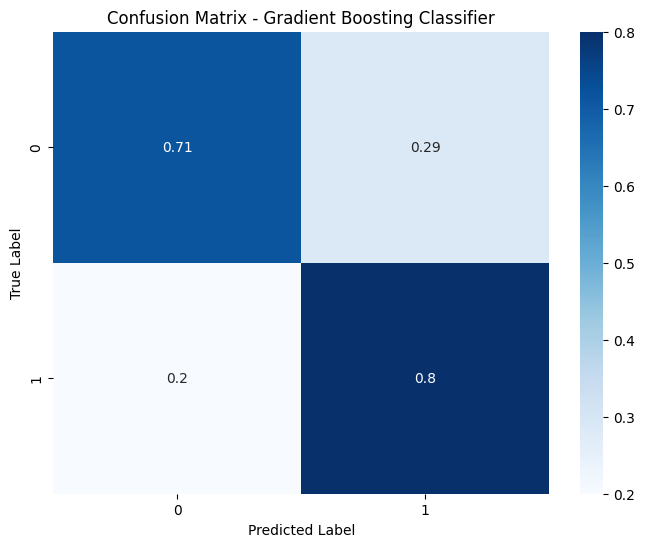

In [13]:
# Plot confusion matrix for Gradient Boosting classifier
cm = confusion_matrix(y_test, y_pred_gbc)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Gradient Boosting Classifier')

plt.show()